In [1]:
import sys
sys.path.append('..')
import numpy as np 
import pandas as pd
import cryptopunks.utils as cp

In [2]:
# cv and learning imports
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [138]:
def plot_in_grid(n, data, predictions, labels):
    # celeb_data, celeb_labels
  (x,y) = (n,n)
  # create figure
  fig = plt.figure(figsize=(9,14))

  i=0
  for i in range(1,(x*y)+1):
    fig.add_subplot(x, y, i)
    img = data[i]
    plt.imshow(img)
    plt.title(f"{predictions[i]},{labels[i]}")
    plt.axis('off')
    i=i+1

In [78]:
def getPunkFilename(d, x):
    return f'''{d}/punk{"%04d" % x.id}.png'''

df = pd.read_csv(f"{cp.__ROOT_DIR__}/data/punx/punks_df.csv", index_col='pid')
df['img_uri'] = df.agg(lambda x: getPunkFilename(cp.__PUNK_DIR__, x), axis=1)



def mapColumnsToGender(row):
    if(row.alien == 1):
        return 'alien'
    elif(row.ape == 1):
        return 'ape'
    elif(row.zombie == 1):
        return 'zombie'
    elif(row.female == 1):
        return 'female'
    elif(row.male == 1):
        return 'male'
    return None
df['gender'] = df.agg(lambda x: mapColumnsToGender(x), axis=1)

df.head(5)

,id,alien,ape,zombie,female,male,beanie,choker,pilotHelmet,tiara,...,nerdGlasses,blackLipstick,mole,purpleLipstick,hotLipstick,cigarette,earring,straightHairDark,img_uri,gender
pid,,,,,,,,,,,,,,,,,,,,,
0,0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,/home/david/artwork/zombiepunx/cryptopunks/dat...,female
1,1,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,/home/david/artwork/zombiepunx/cryptopunks/dat...,male
2,2,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,/home/david/artwork/zombiepunx/cryptopunks/dat...,female
3,3,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,/home/david/artwork/zombiepunx/cryptopunks/dat...,male
4,4,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,/home/david/artwork/zombiepunx/cryptopunks/dat...,male


In [4]:
class ImageData():
    """
       Store ndarray in class to retain its shape
    """
    def __init__(self, x):
        self._x=x

In [5]:
def getPunkImageData(id):
  p_9999 = cp.get_punk(id)
  return ImageData(p_9999)
  #p_9999_flat = cp.flatten(p_9999)
  #p_9999_encoded = cp.v_color_map_encode(p_9999_flat)

In [6]:
df['img_array'] = df.agg(lambda x: getPunkImageData(x.id), axis=1)

In [7]:
(data, labels) = (np.array([x._x for x in df['img_array'].values]),
                  df['gender'].values)

In [8]:
d_24_24_3 = 1728
d_24_24_4 = 2304
data = data.reshape((data.shape[0], d_24_24_3))

In [9]:
# encode the labels as integers
le = LabelEncoder()
le.fit(labels)
labels = le.transform(labels)

In [10]:
(trainX, testX, trainY, testY) = train_test_split(data, 
                                                  labels,
                                                  test_size=0.25, 
                                                  random_state=102)

### pull in some really far outsample data

In [115]:
__CELEB_DIR__="/home/david/artwork/zombiepunx/celeb/img_align_celeba"
def getCelebImageData(s):
    i = mpimg.imread(f"{__CELEB_DIR__}/{s}")
    i1 = cv2.resize(i, (24, 24), interpolation=cv2.INTER_AREA)
    return ImageData(i1)

def mapCelebToGender(row):
    if(row['male'] == 1):
        return 'male'
    return 'female'


In [140]:
celeb_df = pd.read_csv(f"../celeb/list_attr_celeba.csv")
celeb_df.columns= celeb_df.columns.str.lower()
celeb_df['female'] = celeb_df['male'] * -1
celeb_df['img_url'] = celeb_df.agg(lambda x: f"{__CELEB_DIR__}/{x.image_id}", axis=1)

In [141]:
celeb_df = celeb_df[0:1000]
celeb_df['gender'] = celeb_df.agg(lambda x: mapCelebToGender(x), axis=1)
celeb_df['img_array'] = celeb_df.agg(lambda x: getCelebImageData(x.image_id), axis=1)

In [142]:
(celeb_data, celeb_labels) = (np.array([x._x for x in celeb_df['img_array'].values]),
                  celeb_df['gender'].values)

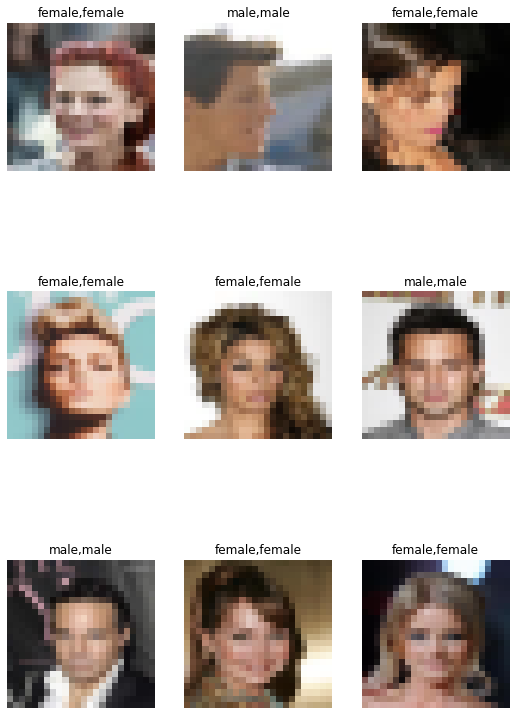

In [143]:
plot_in_grid(3, celeb_data, celeb_labels, celeb_labels)

In [144]:
celeb_data = celeb_data.reshape((celeb_data.shape[0], d_24_24_3))
celeb_labels = le.transform(celeb_labels)

In [145]:
(celeb_trainX, 
 celeb_testX, 
 celeb_trainY, 
 celeb_testY) = train_test_split(celeb_data, 
                                 celeb_labels, 
                                 test_size=0.8, 
                                 random_state=102)

### Evalute KNN Classifier

In [132]:
model = KNeighborsClassifier(n_neighbors=100,
        n_jobs=-1)
model.fit(trainX, trainY)

KNeighborsClassifier(n_jobs=-1, n_neighbors=100)

### run on the cryptopunks

In [16]:
print(classification_report(testY, model.predict(testX),
        target_names=le.classes_))

              precision    recall  f1-score   support

       alien       0.00      0.00      0.00         4
         ape       0.00      0.00      0.00         6
      female       1.00      1.00      1.00       934
        male       0.98      1.00      0.99      1535
      zombie       0.00      0.00      0.00        21

    accuracy                           0.99      2500
   macro avg       0.40      0.40      0.40      2500
weighted avg       0.98      0.99      0.98      2500



/home/david/miniconda3/envs/zombiepunx/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### now, run on the celebrities

In [133]:
x = classification_report(celeb_testY, 
                          model.predict(celeb_testX),
                          labels=[2,3],
                         target_names=['female', 'male'])
print(x)

              precision    recall  f1-score   support

      female       0.64      0.32      0.43       453
        male       0.46      0.76      0.58       347

    accuracy                           0.51       800
   macro avg       0.55      0.54      0.50       800
weighted avg       0.56      0.51      0.49       800



## show the punk predictions

In [134]:
(predict, test) = ([le.classes_[i] for i in model.predict(testX[0:100])],
                [le.classes_[i] for i in testY[0:100]])

In [135]:
(c_predict, c_test) = ([le.classes_[i] for i in model.predict(celeb_testX[0:100])],
                [le.classes_[i] for i in celeb_testY[0:100]])

## plot the punks

TypeError: Invalid shape (1728,) for image data

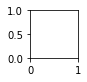

In [146]:
plot_in_grid(9, testX, predict, test)

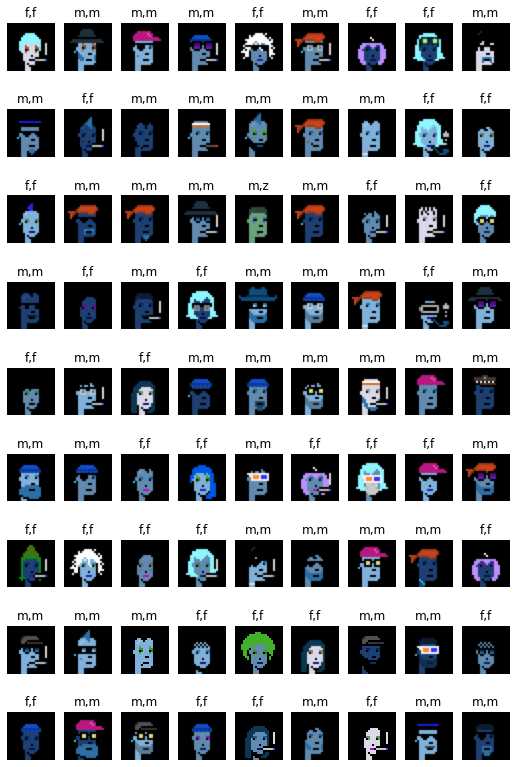

In [136]:
n=9
(x,y) = (n,n)
# create figure
fig = plt.figure(figsize=(9,14))

i=0
for i in range(1,(x*y)+1):
    fig.add_subplot(x, y, i)
    img = testX[i].reshape(24,24,3)
    plt.imshow(img)
    plt.title(f"{predict[i][0]},{test[i][0]}")
    plt.axis('off')
    i=i+1

## plot the celebs

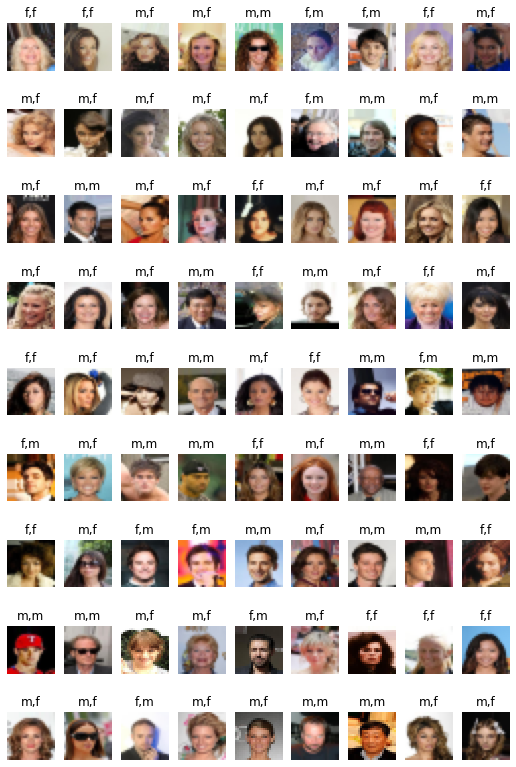

In [137]:
n=9
(x,y) = (n,n)
# create figure
fig = plt.figure(figsize=(9,14))

i=0
for i in range(1,(x*y)+1):
    fig.add_subplot(x, y, i)
    img = celeb_testX[i].reshape(24,24,3)
    plt.imshow(img)
    plt.title(f"{c_predict[i][0]},{c_test[i][0]}")
    plt.axis('off')
    i=i+1